In [85]:
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import re
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from math import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import ast
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


In [86]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

In [87]:
def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

In [88]:
train_df = text_to_dict(pd.read_csv('train.csv/train.csv'))

In [89]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   object 
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   3000 non-null   object 
 12  production_countries   3000 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [91]:
train_df.isna().sum()

id                          0
belongs_to_collection       0
budget                      0
genres                      0
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies        0
production_countries        0
release_date                0
runtime                     2
spoken_languages            0
status                      0
tagline                   597
title                       0
Keywords                    0
cast                        0
crew                        0
revenue                     0
dtype: int64

In [92]:
train_df.shape[0]

3000

In [93]:
train_df[["belongs_to_collection","title"]].sample(10)

,belongs_to_collection,title
234,{},The Lost City of Z
482,{},Riding in Cars with Boys
2000,{},The One and Only
2727,{},Kill List
439,{},Aquarius
424,{},How About You...
1505,{},Pride and Prejudice and Zombies
1570,"[{'id': 97460, 'name': 'Lady and the Tramp Col...",Lady and the Tramp
1819,{},Sky. Plane. Girl.
2968,"[{'id': 97307, 'name': 'BloodRayne Collection'...",BloodRayne


In [94]:
# data = train_df
# X = data.iloc[:,1:21]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
# #get correlations of each features in dataset
# corrmat = data.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [95]:
for index,row in train_df.iterrows():
    if row["belongs_to_collection"] != {}:
        for i in row["belongs_to_collection"]:
            train_df["belongs_to_collection"][index] = i["name"]
    else:
        title = row["title"]
        if (title.split()[0].isdigit()) and (len(title.split()) >= 1 ) :
            train_df["belongs_to_collection"][index] = (title.strip())+" Collection"
        else:
            regex = r"([a-zA-Z \d \, \[ \] \' \. \& \( \) \_ \! \? \x00-\x7F]*)"
            train_df["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\1120776138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["belongs_to_collection"][index] = i["name"]
C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\1120776138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["belongs_to_collection"][index] = i["name"]
C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\1120776138.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

budget

In [96]:
train_df.replace(0,train_df["budget"].mean(),inplace=True)
train_df[train_df["budget"] == 0]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


genres

In [97]:
train_df["genres"] = train_df["genres"].apply(lambda x: train_df["genres"].mode()[0] if x=={} else x)

In [98]:
list_of_genres = list(train_df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_df["genre_count"] = train_df["genres"].apply(lambda x: len(x))
train_df['all_genres'] = train_df['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train_df['genre_' + g] = train_df['all_genres'].apply(lambda x: 1 if g in x else 0)

In [99]:
train_df[train_df["genres"] == {}]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music


In [100]:
train_df[["genres","genre_count"]].sample(5)

,genres,genre_count
1135,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",3
1207,"[{'id': 12, 'name': 'Adventure'}, {'id': 53, '...",2
1665,"[{'id': 18, 'name': 'Drama'}]",1
1813,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",5
269,"[{'id': 99, 'name': 'Documentary'}, {'id': 107...",3


production companies

In [101]:
filler = train_df["production_companies"].value_counts().index.to_list()[1]
train_df["production_companies"] = train_df["production_companies"].apply(lambda x: filler if x=={} else x)

In [102]:
list_of_companies = list(train_df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_df["companies_count"] = train_df["production_companies"].apply(lambda x: len(x))
train_df['all_production_companies'] = train_df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train_df['production_company_' + g] = train_df['all_production_companies'].apply(lambda x: 1 if g in x else 0)

In [103]:
train_df[train_df["production_companies"] == {}]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,companies_count,all_production_companies,production_company_Paramount Pictures,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films


In [104]:
train_df[["production_companies","companies_count"]]

,production_companies,companies_count
0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",3
1,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1
2,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",3
3,"[{'name': 'Paramount Pictures', 'id': 4}]",1
4,"[{'name': 'Paramount Pictures', 'id': 4}]",1
...,...,...
2995,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",2
2996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...",2
2997,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",3
2998,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",2


production countries

In [105]:
train_df["production_countries"] = train_df["production_countries"].apply(lambda x: train_df["production_countries"].mode()[0] if x=={} else x)

In [106]:
list_of_countries = list(train_df['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_df["countres_count"] = train_df["production_countries"].apply(lambda x: len(x)) 
train_df['all_countries'] = train_df['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train_df['production_country_' + g] = train_df['all_countries'].apply(lambda x: 1 if g in x else 0)

In [107]:
train_df[["production_countries","countres_count"]]

,production_countries,countres_count
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
3,"[{'iso_3166_1': 'IN', 'name': 'India'}]",1
4,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",1
...,...,...
2995,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
2996,"[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",2
2997,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
2998,"[{'iso_3166_1': 'US', 'name': 'United States o...",1


release date

In [109]:
train_df["release_date"] = pd.to_datetime(train_df["release_date"])
train_df["release_year"] = train_df["release_date"].dt.year
train_df["release_month"] = train_df["release_date"].dt.month
train_df["release_day"] = train_df["release_date"].dt.day
train_df["release_day_name"] = train_df["release_date"].dt.day_name()

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\2211787445.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["release_date"] = pd.to_datetime(train_df["release_date"])


runtime

In [110]:
train_df["runtime"] = train_df["runtime"].fillna(train_df["runtime"].mean())

spoken languages

In [111]:
train_df["spoken_languages"] = train_df["spoken_languages"].apply(lambda x: train_df["spoken_languages"].mode()[0] if x=={} else x)

In [112]:
list_of_languages = list(train_df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_df["languages_count"] = train_df["spoken_languages"].apply(lambda x: len(x))
train_df['all_languages'] = train_df['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train_df['language_' + g] = train_df['all_languages'].apply(lambda x: 1 if g in x else 0)

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\1312011508.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['language_' + g] = train_df['all_languages'].apply(lambda x: 1 if g in x else 0)
C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\1312011508.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['language_' + g] = train_df['all_languages'].apply(lambda x: 1 if g in x else 0)
C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\1312011508.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [113]:
train_df[["spoken_languages","languages_count"]]

,spoken_languages,languages_count
0,"[{'iso_639_1': 'en', 'name': 'English'}]",1
1,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2,"[{'iso_639_1': 'en', 'name': 'English'}]",1
3,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2
4,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",1
...,...,...
2995,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2996,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",1
2997,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2998,"[{'iso_639_1': 'en', 'name': 'English'}]",1


Keywords

In [114]:
fi = train_df["Keywords"].value_counts().index.to_list()[1]
# print(fi)
train_df["Keywords"] = train_df["Keywords"].apply(lambda x: fi if x=={} else x)

In [115]:
train_df["Keywords_count"] = train_df["Keywords"].apply(lambda x: len(x))

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\3390098530.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df["Keywords_count"] = train_df["Keywords"].apply(lambda x: len(x))


In [116]:
train_df[["Keywords","Keywords_count"]]

,Keywords,Keywords_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",4
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",4
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",12
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",7
4,"[{'id': 10183, 'name': 'independent film'}]",1
...,...,...
2995,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...",19
2996,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...",6
2997,"[{'id': 441, 'name': 'assassination'}, {'id': ...",14
2998,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...",22


cast

In [117]:
fi2 = train_df["cast"].value_counts().index.to_list()[2]
print(fi2)
train_df["cast"] = train_df["cast"].apply(lambda x: fi2 if (x=={}) or (x==[])  else x)

[{'cast_id': 2, 'character': 'David Sloan', 'credit_id': '52fe44b3c3a368484e0320b1', 'gender': 2, 'id': 75312, 'name': 'Sasha Mitchell', 'order': 0, 'profile_path': '/caQ4WuNAPNeozlcLummEE2GLc5i.jpg'}, {'cast_id': 3, 'character': 'Justin Maciah', 'credit_id': '52fe44b3c3a368484e0320b5', 'gender': 2, 'id': 1039, 'name': 'Peter Boyle', 'order': 1, 'profile_path': '/hAZw6rJlAemlqND09Km7qGvpZ6D.jpg'}, {'cast_id': 4, 'character': 'Xian Chow', 'credit_id': '52fe44b3c3a368484e0320b9', 'gender': 2, 'id': 64662, 'name': 'Dennis Chan', 'order': 2, 'profile_path': '/qZiaEH1JJt8c0WUPJl9gqArGT2P.jpg'}, {'cast_id': 5, 'character': 'Sanga', 'credit_id': '52fe44b3c3a368484e0320bd', 'gender': 2, 'id': 11398, 'name': 'Cary-Hiroyuki Tagawa', 'order': 3, 'profile_path': '/6KLAW9vcrI1FLLLrTAm0obL4qxc.jpg'}, {'cast_id': 6, 'character': 'Jack', 'credit_id': '52fe44b3c3a368484e0320c1', 'gender': 2, 'id': 4942, 'name': 'John Diehl', 'order': 4, 'profile_path': '/hDUvgqpIv753skoeRGjVw6gYp7A.jpg'}, {'cast_id': 7

In [118]:
train_df["cast_count"] = train_df["cast"].apply(lambda x:len(x))

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\15752097.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df["cast_count"] = train_df["cast"].apply(lambda x:len(x))


In [119]:
train_df[["cast","cast_count"]]

,cast,cast_count
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",24
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",20
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",51
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",7
4,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",4
...,...,...
2995,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...",15
2996,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...",11
2997,"[{'cast_id': 10, 'character': 'Samantha Caine ...",15
2998,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...",26


crew

In [120]:
fi3 = train_df["crew"].value_counts().index.to_list()[1]
train_df["crew"] = train_df["crew"].apply(lambda x: fi3 if x=={} else x)

In [121]:
train_df["crew_count"] = train_df["crew"].apply(lambda x:len(x))

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\593247919.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df["crew_count"] = train_df["crew"].apply(lambda x:len(x))


In [122]:
train_df[["crew","crew_count"]]

,crew,crew_count
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",72
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",9
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",64
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",3
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",2
...,...,...
2995,"[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",17
2996,"[{'credit_id': '5716b72ac3a3686678012c84', 'de...",15
2997,"[{'credit_id': '52fe443a9251416c7502d579', 'de...",10
2998,"[{'credit_id': '556f817b9251410866000a63', 'de...",89


In [123]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,companies_count,all_production_companies,production_company_Paramount Pictures,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,countres_count,all_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,release_year,release_month,release_day,release_day_name,languages_count,all_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,Keywords_count,cast_count,crew_count
0,1,Hot Tub Time Machine Collection,14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,United States of America,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,2,20,Friday,1,English,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,24,72
1,2,The Princess Diaries Collection,400

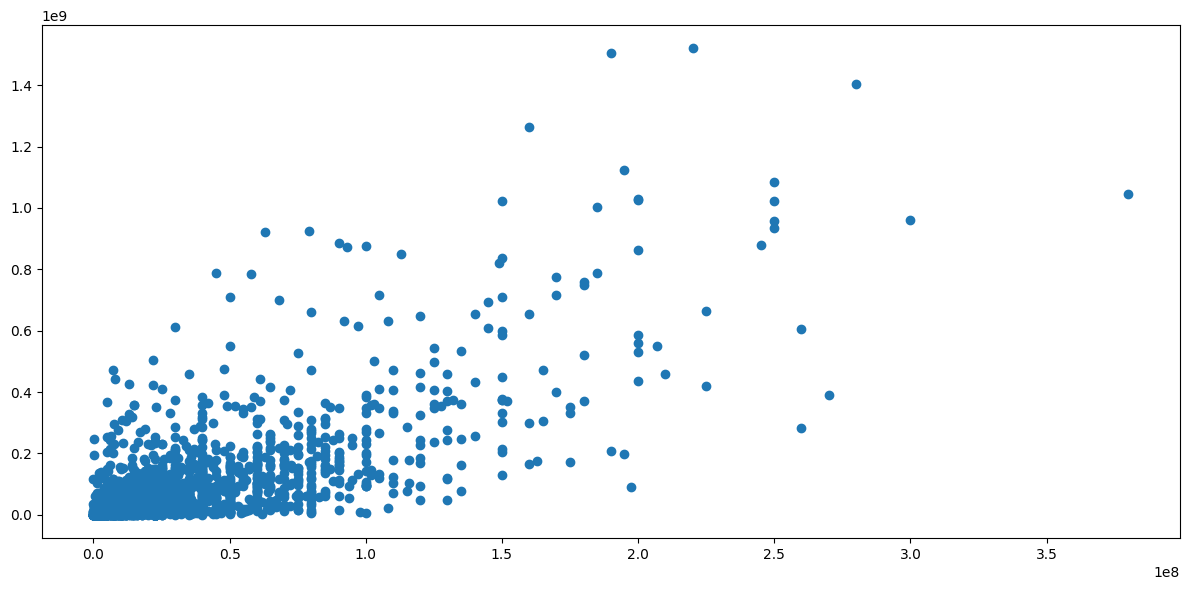

In [124]:
plt.figure(figsize=(12,6))
plt.scatter(train_df["budget"],train_df["revenue"])
plt.tight_layout()

In [125]:
genre_count = (train_df["genres"].apply(lambda x: [i["name"] for i in x]))
genre_count = Counter([j for i in genre_count for j in i])

,Genre,Values
0,Comedy,1028
1,Drama,1538
2,Family,260
3,Romance,571
4,Thriller,789
5,Action,741
6,Animation,141
7,Adventure,439
8,Horror,301
9,Documentary,87


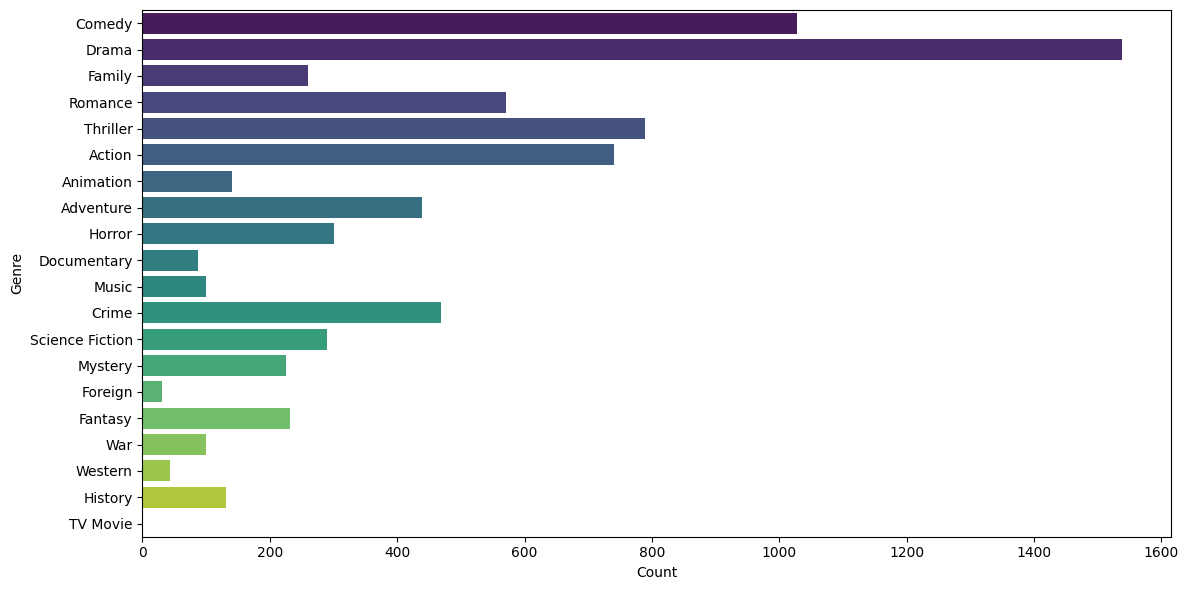

In [126]:
genre_count = dict(genre_count)
genre_df = pd.DataFrame({"Genre":genre_count.keys(),"Values":genre_count.values()})
plt.figure(figsize=(12,6))
sns.barplot(y=genre_df["Genre"],x=genre_df["Values"],palette="viridis")
plt.xlabel("Count")
plt.tight_layout()
genre_df

,belongs_to_collection,count
0,James Bond Collection,16
1,Friday the 13th Collection,7
2,The Pink Panther (Original) Collection,6
3,Pokémon Collection,5
4,Police Academy Collection,5
5,Alien Collection,4
6,The Fast and the Furious Collection,4
7,Rocky Collection,4
8,Transformers Collection,4
9,Paranormal Activity Collection,4


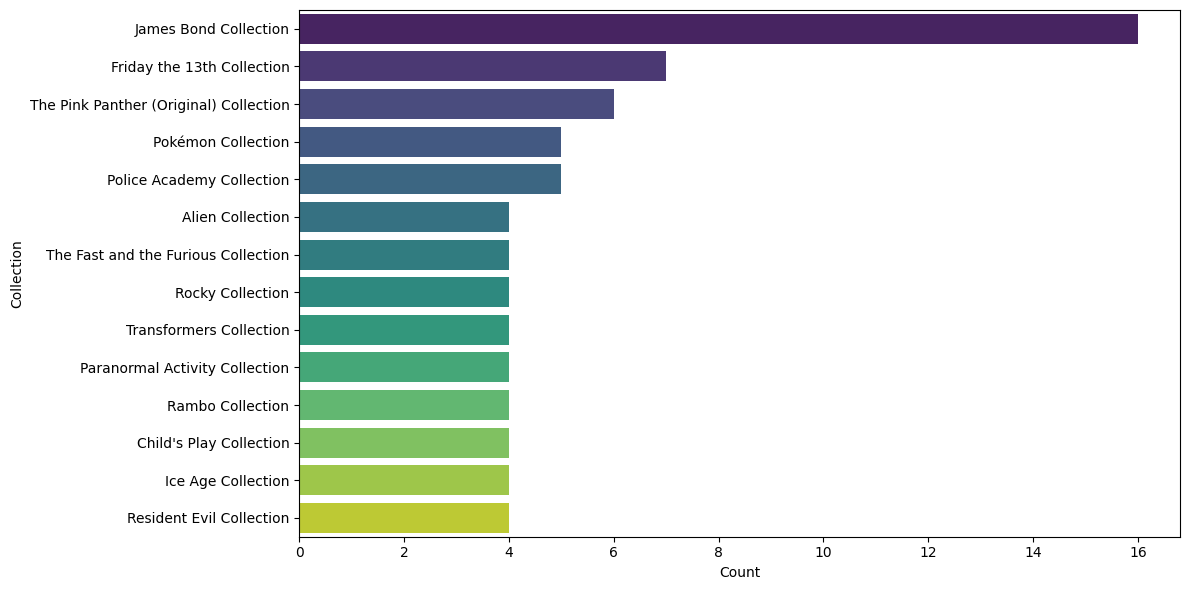

In [127]:
belongs_to_collection_df = train_df["belongs_to_collection"].value_counts()[:14].to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x=belongs_to_collection_df["count"],y=belongs_to_collection_df["belongs_to_collection"],palette="viridis")
plt.xlabel("Count")
plt.ylabel("Collection")
plt.tight_layout()
belongs_to_collection_df

In [128]:
train_df["original_language"].value_counts()


original_language
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: count, dtype: int64

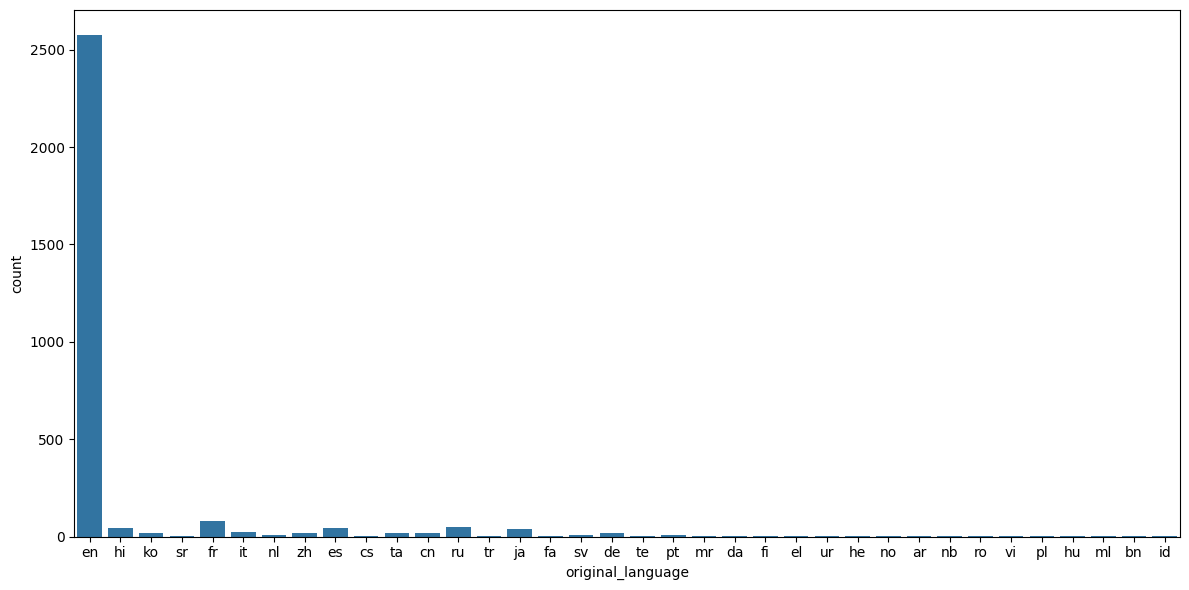

In [129]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["original_language"])
plt.tight_layout()

In [131]:
companies_count = (train_df["production_companies"].apply(lambda x: [i["name"] for i in x]))
companies_count = Counter([j for i in companies_count for j in i])
companies_count = companies_count.most_common()


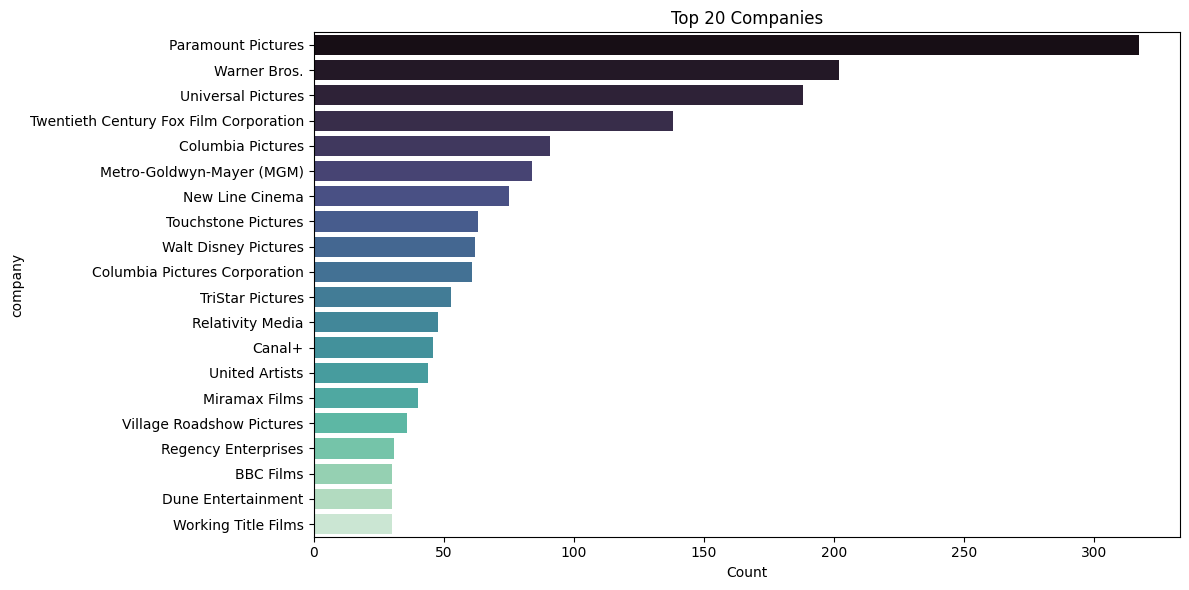

In [132]:
companies_count = dict(companies_count)
company_df = pd.DataFrame({"company":companies_count.keys(),"Values":companies_count.values()})
plt.figure(figsize=(12,6))
sns.barplot(y = company_df[:20]["company"],x = company_df[:20]["Values"],palette="mako")
plt.title("Top 20 Companies")
plt.xlabel("Count")
plt.tight_layout()


In [133]:
countries_count = (train_df["production_countries"].apply(lambda x: [i["name"] for i in x]))
countries_count = Counter([j for i in countries_count for j in i])
countries_count = countries_count.most_common()


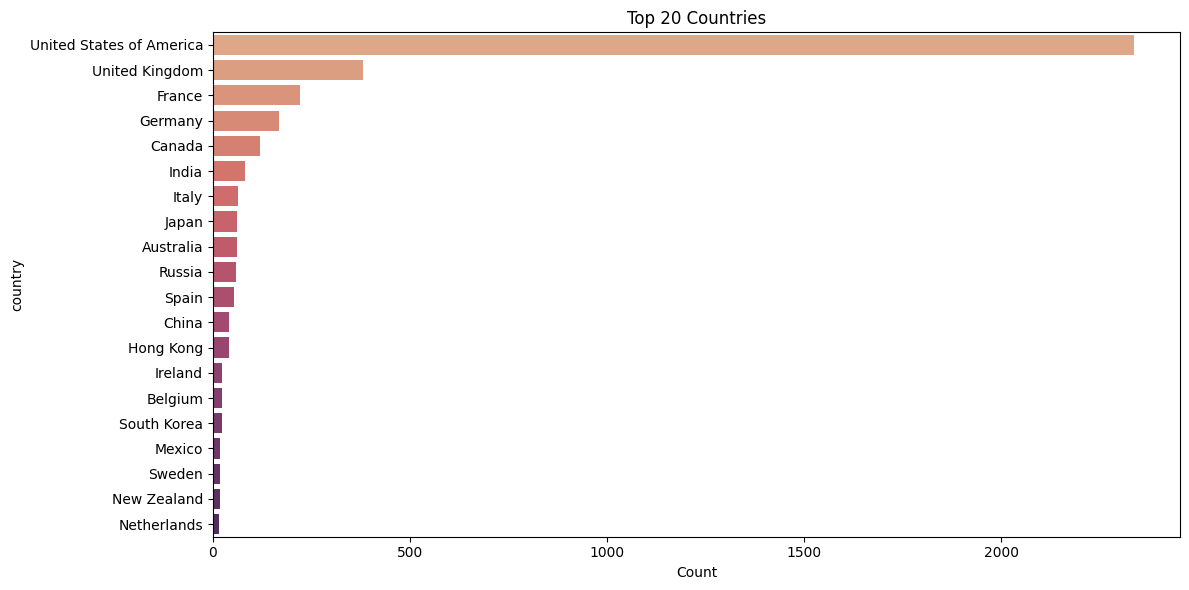

In [134]:
countries_count = dict(countries_count)
countries_df = pd.DataFrame({"country":countries_count.keys(),"Values":countries_count.values()})
plt.figure(figsize=(12,6))
sns.barplot(y = countries_df[:20]["country"],x = countries_df[:20]["Values"],palette="flare")
plt.title("Top 20 Countries")
plt.xlabel("Count")
plt.tight_layout()


In [135]:
# plt.figure(figsize=(12,6))
# sns.histplot(x = train_df["release_year"])
# plt.tight_layout()

In [136]:
languages_count = (train_df["spoken_languages"].apply(lambda x: [i["name"] for i in x]))
languages_count = Counter([j for i in languages_count for j in i])
languages_count = languages_count.most_common()
languages_count

[('English', 2638),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27),
 ('Polski', 25),
 ('Magyar', 24),
 ('Latin', 23),
 ('svenska', 22),
 ('ภาษาไทย', 22),
 ('Český', 20),
 ('עִבְרִית', 15),
 ('ελληνικά', 15),
 ('Türkçe', 13),
 ('Dansk', 13),
 ('Nederlands', 10),
 ('فارسی', 10),
 ('Tiếng Việt', 10),
 ('اردو', 8),
 ('Română', 8),
 ('తెలుగు', 7),
 ('Kiswahili', 7),
 ('Norsk', 7),
 ('No Language', 7),
 ('suomi', 6),
 ('Український', 6),
 ('Srpski', 4),
 ('Afrikaans', 4),
 ('Gaeilge', 3),
 ('Català', 3),
 ('বাংলা', 3),
 ('ਪੰਜਾਬੀ', 3),
 ('Somali', 3),
 ('Íslenska', 3),
 ('български език', 2),
 ('shqip', 2),
 ('Bahasa indonesia', 2),
 ('Slovenčina', 2),
 ('Esperanto', 2),
 ('euskera', 2),
 ('isiZulu', 2),
 ('Hrvatski', 2),
 ('қазақ', 1),
 ('Wolof', 1),
 ('Eesti', 1),
 ('پښتو', 1)]

In [137]:
train_df["status"].value_counts()


status
Released    2996
Rumored        4
Name: count, dtype: int64

In [138]:
Keywords_count = (train_df["Keywords"].apply(lambda x: [i["name"] for i in x]))
Keywords_count = Counter([j for i in Keywords_count for j in i])
Keywords_count = Keywords_count.most_common()


In [140]:
# print(train_df["cast"])
cast_count = (train_df["cast"].apply(lambda x: [i["name"] for i in x]))
cast_count = Counter([j for i in cast_count for j in i])
cast_count = cast_count.most_common()


In [142]:
crew_count = (train_df["crew"].apply(lambda x: [i["name"] for i in x]))
crew_count = Counter([j for i in crew_count for j in i])
crew_count = crew_count.most_common()


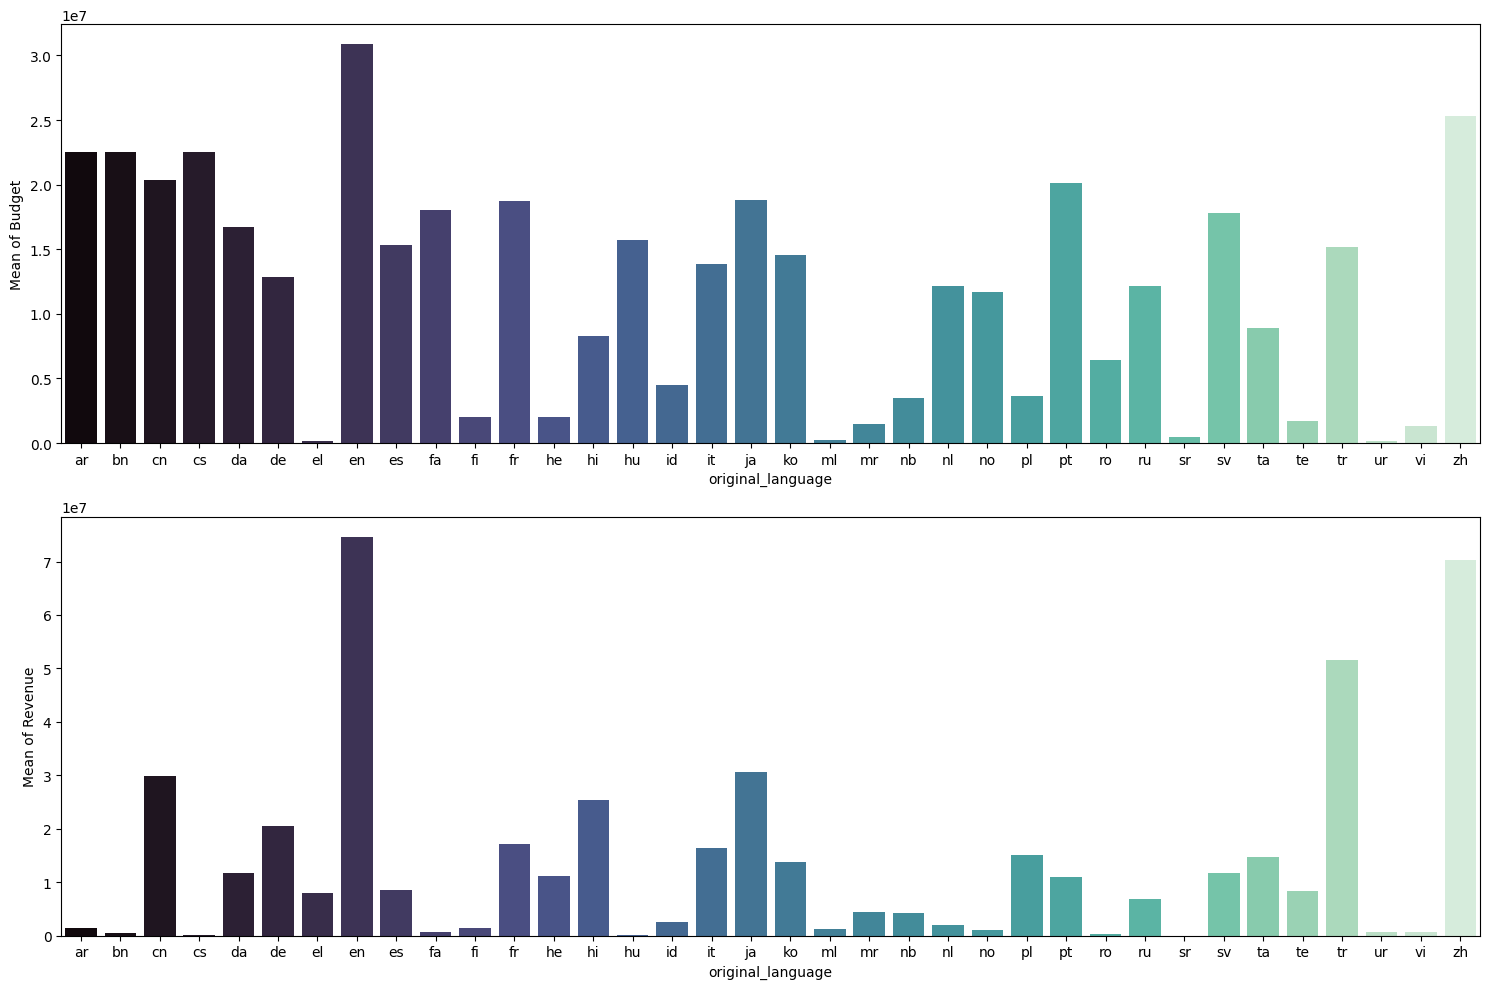

In [144]:
original_language_budget = train_df.groupby("original_language")[["budget","revenue"]].mean().reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["budget"],ax=ax[0],palette="mako")
ax1.set_ylabel("Mean of Budget")
ax2 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["revenue"],ax=ax[1],palette="mako")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

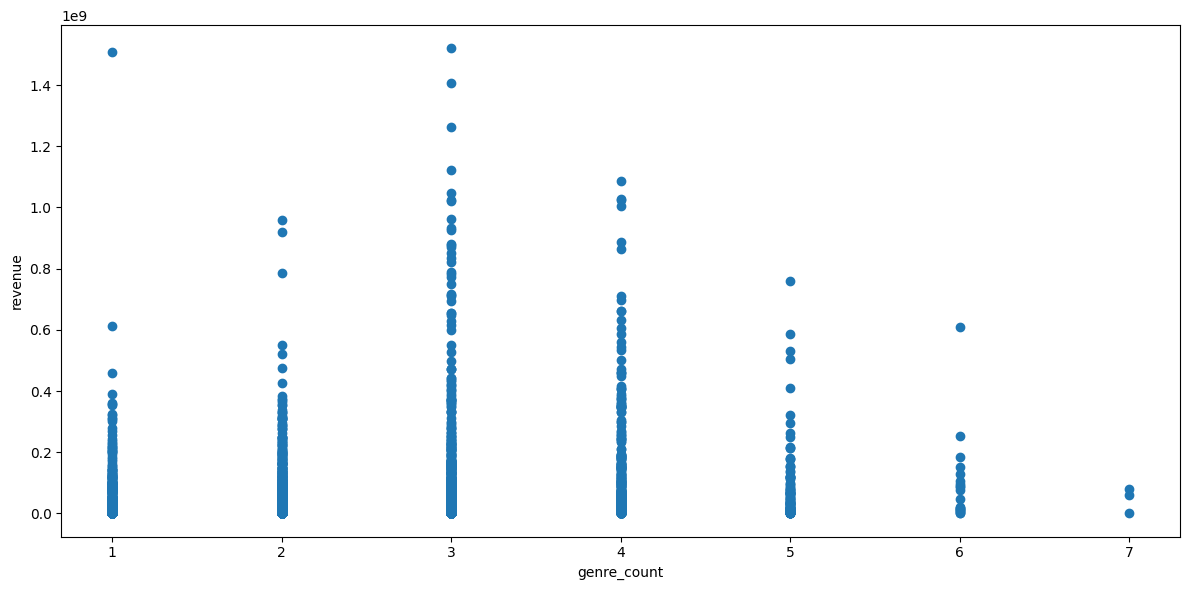

In [145]:
plt.figure(figsize=(12,6))
plt.scatter(train_df["genre_count"],train_df["revenue"])
plt.xlabel("genre_count")
plt.ylabel("revenue")
plt.tight_layout()

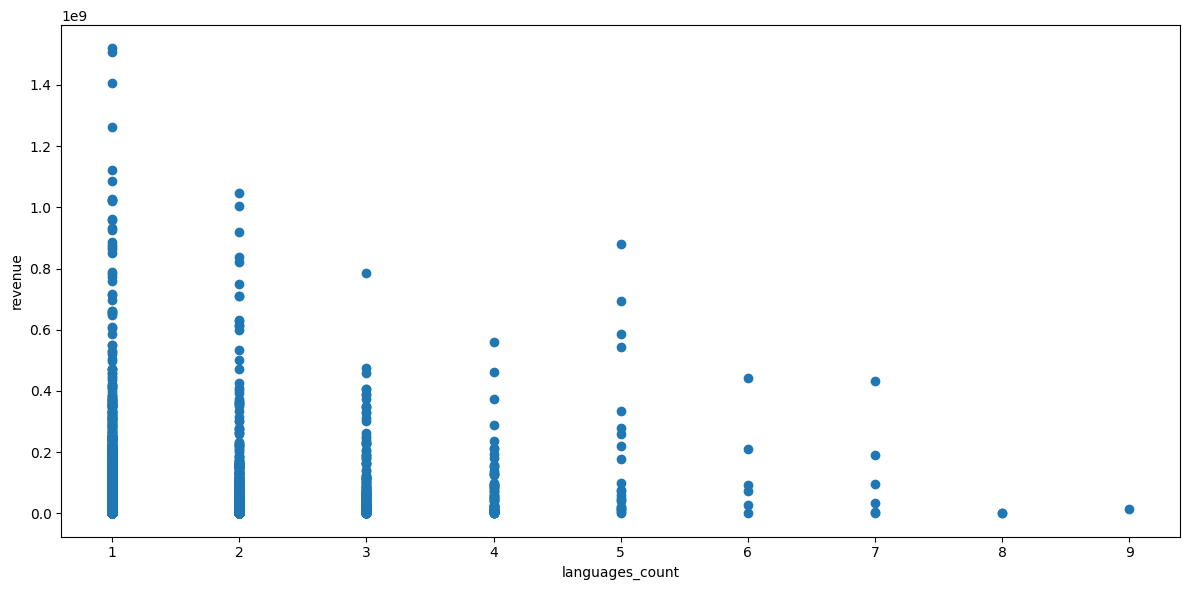

In [146]:
plt.figure(figsize=(12,6))
plt.scatter(train_df["languages_count"],train_df["revenue"])
plt.xlabel("languages_count")
plt.ylabel("revenue")
plt.tight_layout()


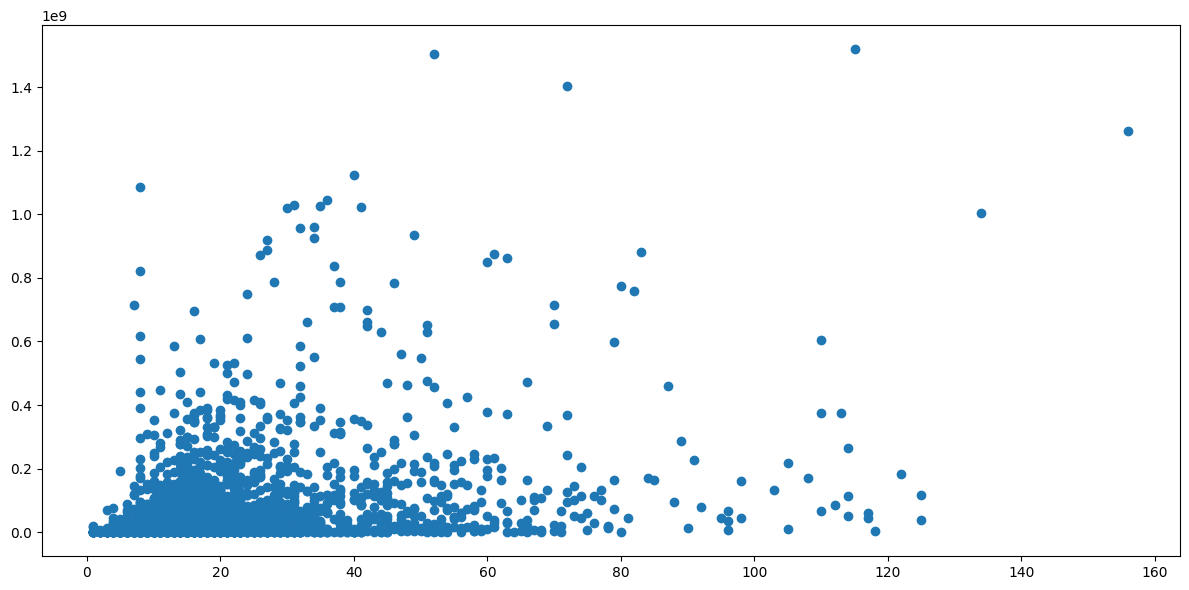

In [149]:
plt.figure(figsize=(12,6))
plt.scatter(train_df["cast_count"],train_df["revenue"])
plt.tight_layout()

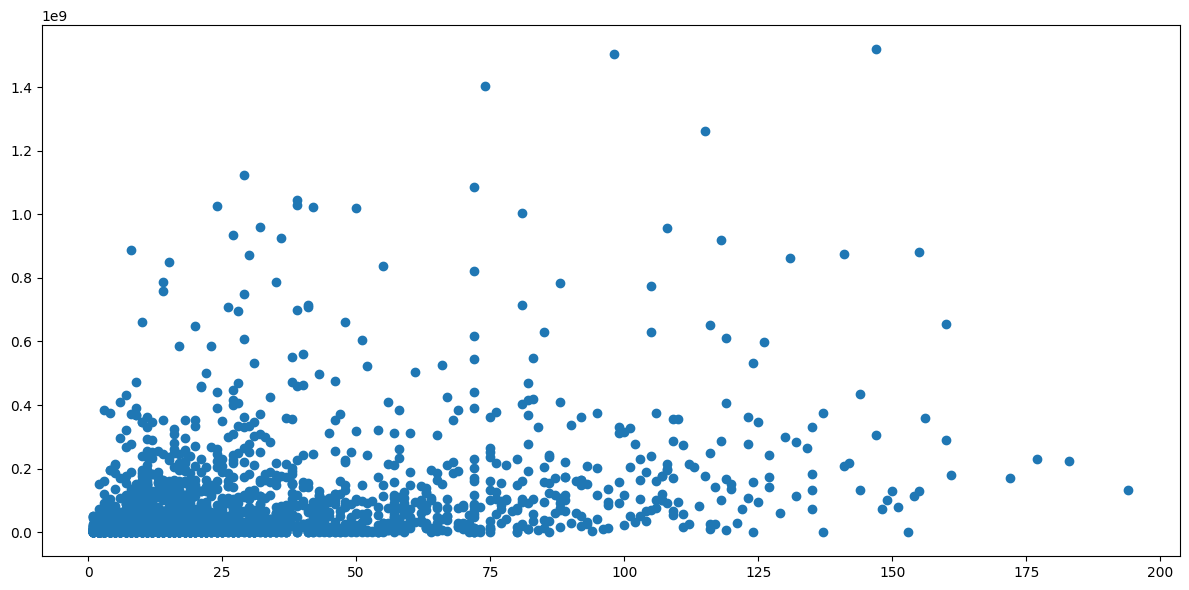

In [150]:
plt.figure(figsize=(12,6))
plt.scatter(train_df["crew_count"],train_df["revenue"])
plt.tight_layout()

<Figure size 1300x600 with 0 Axes>

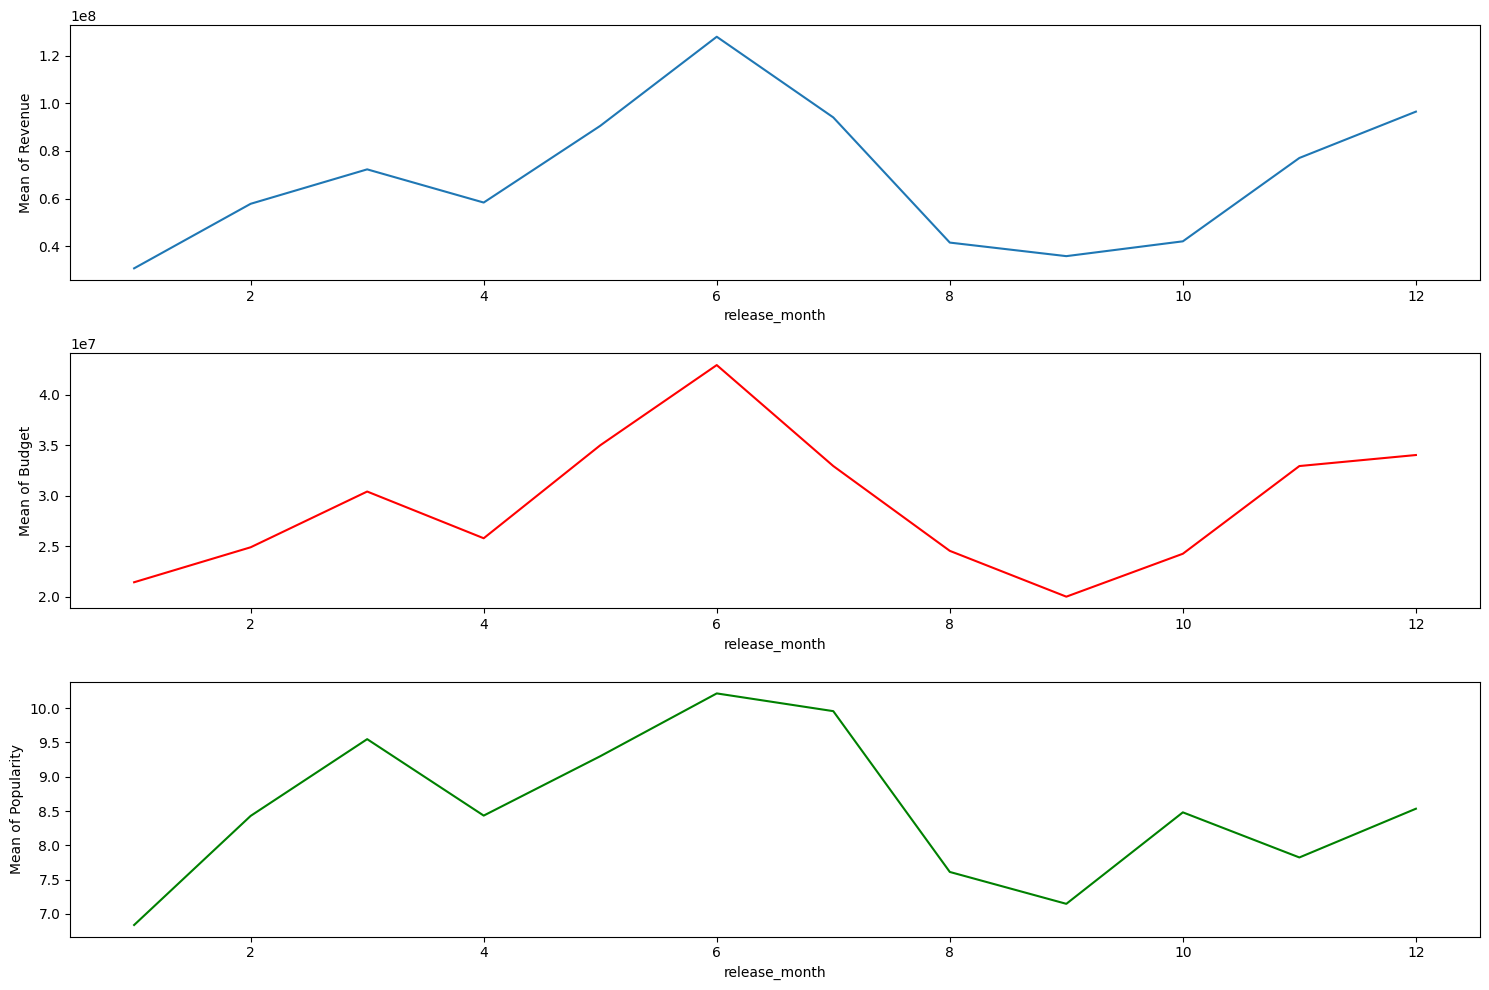

In [151]:
year_df = train_df.groupby("release_month")[["revenue","budget","popularity","runtime"]].mean().reset_index()
plt.figure(figsize=(13,6))
fig , ax = plt.subplots(3,1,figsize = (15,10))
ax1 = sns.lineplot(x=year_df["release_month"],y=year_df["revenue"],ax=ax[0])
ax1.set_ylabel("Mean of Revenue")
ax2 = sns.lineplot(x=year_df["release_month"],y=year_df["budget"],color="r",ax=ax[1])
ax2.set_ylabel("Mean of Budget")
ax3 = sns.lineplot(x=year_df["release_month"],y=year_df["popularity"],color="g",ax=ax[2])
ax3.set_ylabel("Mean of Popularity")
plt.tight_layout()

In [155]:
columns_to_drop=["all_genres","all_languages","all_countries","all_production_companies","id","belongs_to_collection","genres","homepage","imdb_id","status","original_title","overview","poster_path","production_companies","production_countries","release_date","spoken_languages","tagline","title","Keywords","cast","crew","release_day_name"]
ids = train_df['id']
print(train_df)
train_df.drop(columns_to_drop,axis=1,inplace=True)

        id               belongs_to_collection       budget  \
0        1     Hot Tub Time Machine Collection  14000000.00   
1        2     The Princess Diaries Collection  40000000.00   
2        3                 Whiplash Collection   3300000.00   
3        4                  Kahaani Collection   1200000.00   
4        5               Marine Boy Collection  22531334.11   
...    ...                                 ...          ...   
2995  2996                  Chasers Collection  22531334.11   
2996  2997         We Are the Best! Collection  22531334.11   
2997  2998  The Long Kiss Goodnight Collection  65000000.00   
2998  2999         Along Came Polly Collection  42000000.00   
2999  3000                Abduction Collection  35000000.00   

                                                 genres  \
0                        [{'id': 35, 'name': 'Comedy'}]   
1     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                         [{'id': 18, 'name': 'Drama'}]   
3     [

In [156]:
train_df.head()


,budget,original_language,popularity,runtime,revenue,genre_count,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,companies_count,production_company_Paramount Pictures,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,countres_count,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,release_year,release_month,release_day,languages_count,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,Keywords_count,cast_count,crew_count
0,14000000.00,en,6.575393,93.0,12314651,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,2,20,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,24,72
1,40000000.00,en,8.248895,113.0,95149435,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,8,6,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,20,9
2,3300000.00,en,64.299990,105.0,13092000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,10,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,51,64
3,1200000.00,hi,3.174936,122.0,16000000,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3,9,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,3
4,22531334.11,ko,1.148070,118.0,3923970,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2009,2,5,1,0,0,0,

In [157]:
label = LabelEncoder()
train_df["original_language"] = label.fit_transform(train_df["original_language"])


In [158]:
train_df['budget_to_popularity'] = train_df['budget'] / train_df['popularity']
train_df['budget_to_runtime'] = train_df['budget'] / train_df['runtime']

C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\3544846804.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['budget_to_popularity'] = train_df['budget'] / train_df['popularity']
C:\Users\yasha\AppData\Local\Temp\ipykernel_16340\3544846804.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['budget_to_runtime'] = train_df['budget'] / train_df['runtime']


In [159]:
train_df.head()

,budget,original_language,popularity,runtime,revenue,genre_count,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,companies_count,production_company_Paramount Pictures,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,countres_count,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,release_year,release_month,release_day,languages_count,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,Keywords_count,cast_count,crew_count,budget_to_popularity,budget_to_runtime
0,14000000.00,7,6.575393,93.0,12314651,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,2,20,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,24,72,2.129150e+06,150537.634409
1,40000000.00,7,8.248895,113.0,95149435,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,8,6,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,20,9,4.849134e+06,353982.300885
2,3300000.00,7,64.299990,105.0,13092000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,10,10,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,51,64,5.132194e+04,31428.571429
3,1200000.00,13,3.174936,122.0,16000000,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3,9,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,3,3.779604e+05,9836.065574
4,22531334.11,18,1.148070,118.0,3923970,2,0,0,1,1,0,0,0,0,0,0,

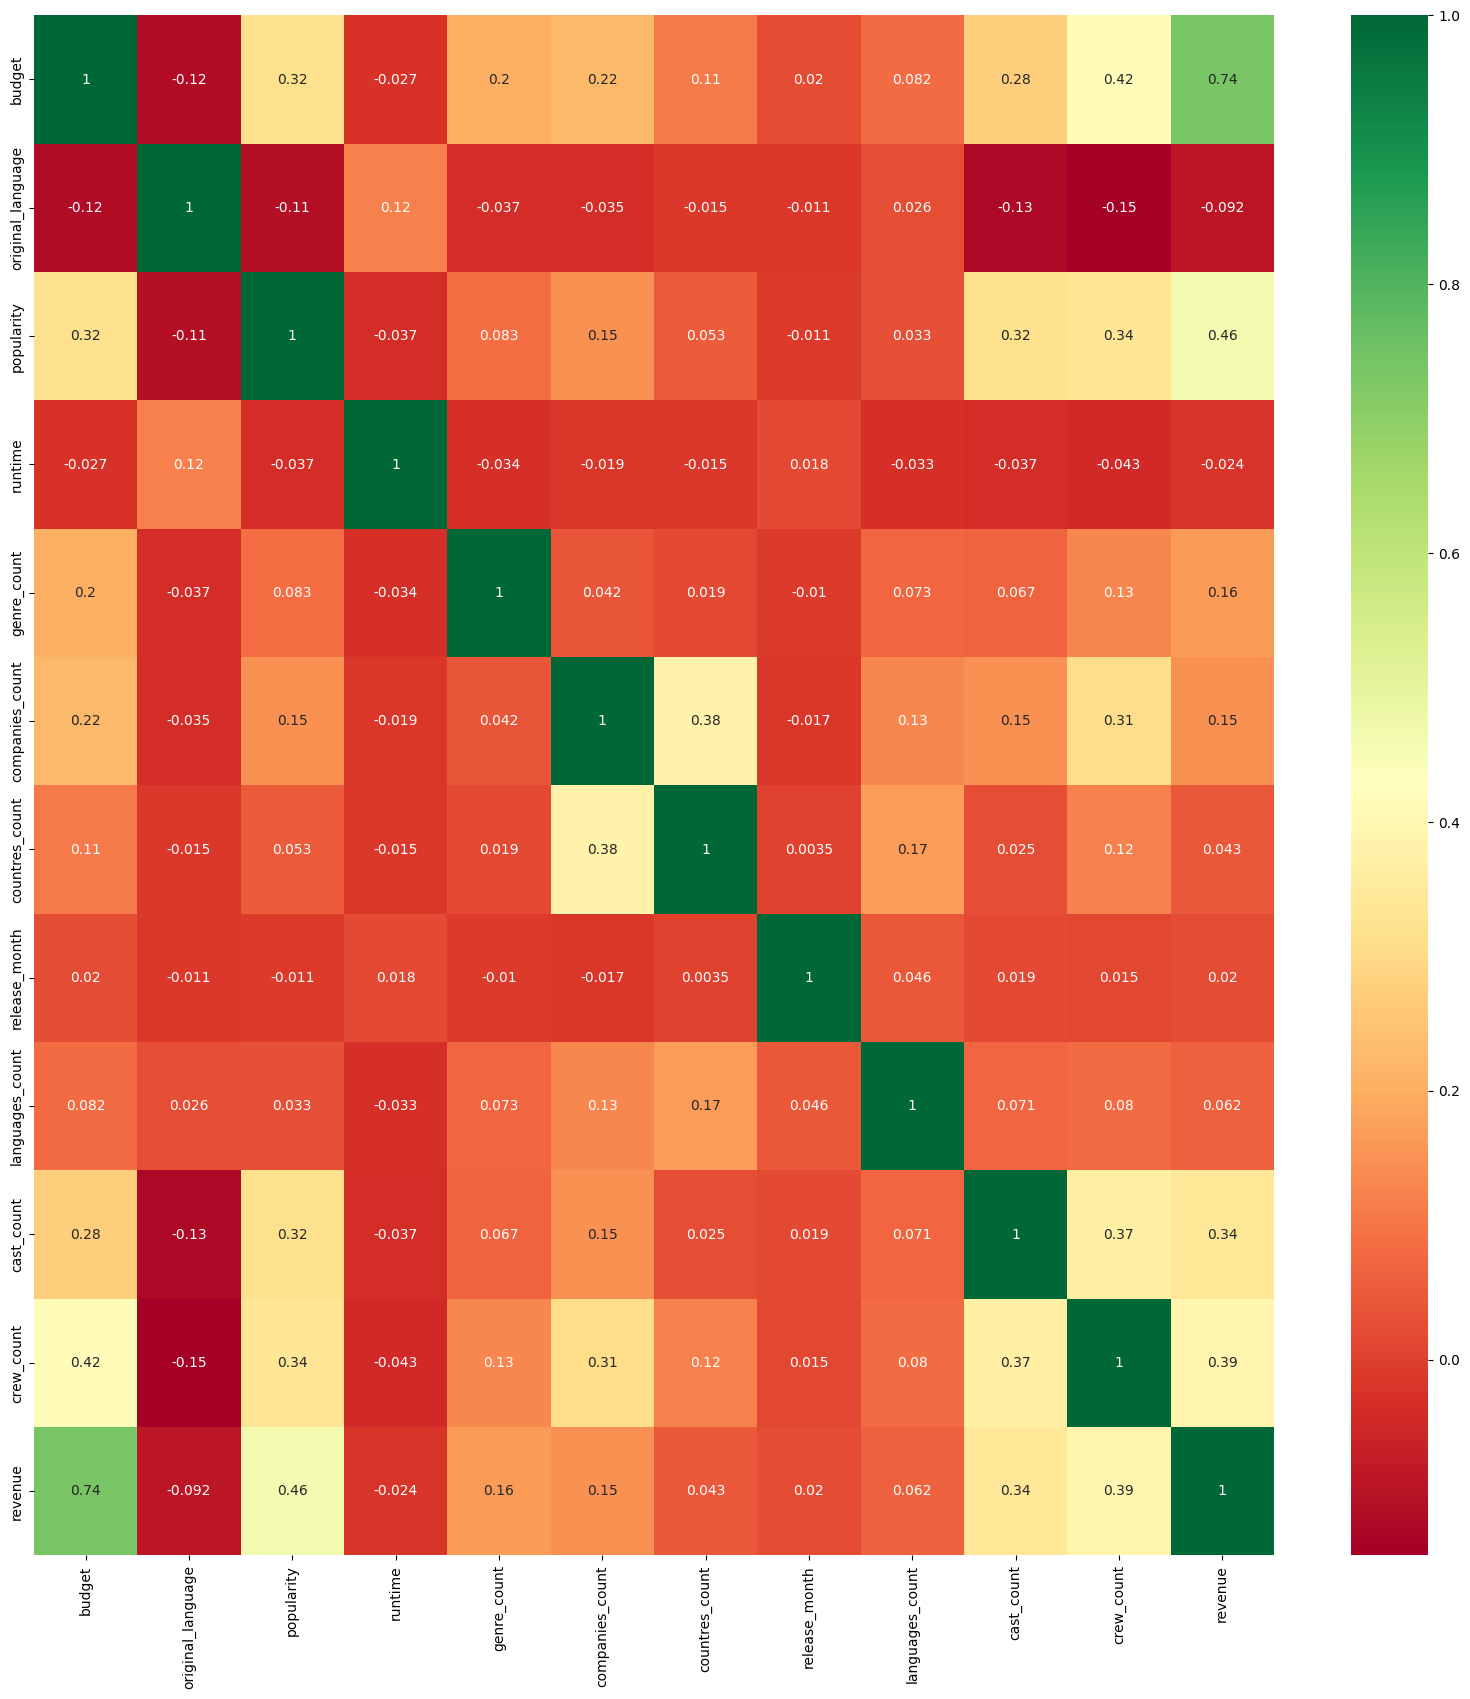

In [160]:
train_df.shape
data = train_df
columnsss = train_df[["budget", "original_language", "popularity", "runtime", "genre_count", "companies_count", "countres_count", "release_month", "languages_count", "cast_count", "crew_count", "revenue"]]

corrmat = columnsss.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [161]:
X = train_df.drop("revenue",axis=1)
Y = train_df["revenue"]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)
id_train, id_test = train_test_split(ids, test_size = 0.3, random_state= 0)



In [163]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [164]:
models=[LinearRegression(),RandomForestRegressor(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
model_names=["LinearRegression","RandomForestRegressor","SVR","KNeighborsRegressor","DecisionTreeRegressor"]
accuracy = []
RMSE = []
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
d=pd.DataFrame({'Modelling Name':model_names,"Accuracy":accuracy,"RMSE":RMSE})


In [165]:
from sklearn.preprocessing import PolynomialFeatures
degrees = [2, 3, 4]
poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)
X_new = poly_features.fit_transform(X_test)
print((model.score(X_new,y_test))*100)



56.34376565188063


In [166]:
d

,Modelling Name,Accuracy,RMSE
0,LinearRegression,63.163473,8.804138e+07
1,RandomForestRegressor,67.841674,8.226105e+07
2,SVR,-15.489321,1.558901e+08
3,KNeighborsRegressor,59.812103,9.195920e+07
4,DecisionTreeRegressor,44.673474,1.078982e+08


tuning random forest

In [167]:
model = RandomForestRegressor(n_estimators= 100)
#defalut values, n_estimators = 100, max_depth = None, min_sample_split = 2, min_samples_leaf = 1
model.fit(X_train,y_train)
print(model.n_estimators)
print(model.score(X_test, y_test))
# 200 0.6830680726861073
# 300 0.6850519082688755
# 400 0.6878072374539206
# 1000# 0.6873892213795647

100
0.668565053575586


In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=1000)

In [169]:
print(best_rf_model.score(X_test, y_test))
print(best_params)


0.6611761245839181
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


tuning svr (TAKES TOO LONG)

In [170]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
print(best_model.score(X_test, y_test))


## TAKES TOO LONG

KeyboardInterrupt: 

kneighbors regressor tuning

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_knn_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_knn_model)
print(best_knn_model.score(X_test, y_test))


Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Model: KNeighborsRegressor(n_neighbors=9)
0.6161511708260223


linear regression tuning  

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

linear_reg = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(linear_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_linear_reg = Ridge(alpha=best_alpha)
best_linear_reg.fit(X_train, y_train)

c:\Users\yasha\OneDrive\Desktop\stod\ML_Project\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.97099e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yasha\OneDrive\Desktop\stod\ML_Project\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.97099e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yasha\OneDrive\Desktop\stod\ML_Project\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.97099e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yasha\OneDrive\Desktop\stod\ML_Project\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.69049e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

Ridge(alpha=100)

In [ ]:
print(best_linear_reg.score(X_test, y_test)*100)

63.900713404116374


In [ ]:
X_train

,budget,original_language,popularity,runtime,genre_count,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,companies_count,production_company_Paramount Pictures,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,countres_count,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,release_year,release_month,release_day,languages_count,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,Keywords_count,cast_count,crew_count,budget_to_popularity,budget_to_runtime
1732,5.500000e+06,13,1.250293,140.0,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,9,13,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,1,4.398969e+06,3.928571e+04
2440,2.700000e+07,7,11.150920,110.0,4,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006,2,24,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,17,16,2.421325e+06,2.454545e+05
1232,2.253133e+07,7,0.618434,116.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,9,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7,14,3.643288e+07,1.942356e+05
1081,1.500000e+07,7,13.183804,110.0,5,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1987,3,6,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,19,13,1.137760e+06,1.363636e+05
2920,2.253133e+07,7,0.042036,92.0,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
Predictions = pd.DataFrame({"id":id_test,"revenue":y_pred})
actual = pd.DataFrame({"id": id_test, "revenue": y_test})

In [ ]:
Predictions


,id,revenue
311,312,2.345268e+07
1025,1026,3.416855e+07
1587,1588,6.668003e+07
2941,2942,4.445362e+07
2980,2981,5.389797e+06
...,...,...
1341,1342,5.626725e+07
1612,1613,3.520601e+07
757,758,1.892736e+08
39,40,9.392811e+06


In [ ]:
actual

,id,revenue
311,312,12250
1025,1026,4187
1587,1588,15556340
2941,2942,6916869
2980,2981,2500000
...,...,...
1341,1342,196114570
1612,1613,154864401
757,758,163733697
39,40,14873
